In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp


In [2]:
N = 4  # Cambiar el nuemro de atomos, debe ser par porque se le agregan son anilos
V_1 = sp.symbols('V_1')
V_2 = sp.symbols('V_2')
g_1 = sp.symbols('g_1')

equations = []

# Inicializar las ecuaciones
for i in range(1, N + 1):
    if i == 1:
        equations.append(f'G{i}{N} = g_1 V_1 G{i+1}{N}')
    elif i == N:
        equations.append(f'G{i}{N} = g_1 + g_1 V_1 G{i-1}{N}')
    elif i == 2:
        equations.append(f'G{i}{N} = g_1 V_2 G{i+1}{N} + g_1 V_1 G{i-1}{N}')
    elif 2 <= i <= N-2:
        equations.append(f'G{i}{N} = g_1 V_2 G{i+1}{N} + g_1 V_2 G{i-1}{N}')
    else:
        equations.append(f'G{i}{N} = g_1 V_1 G{i+1}{N} + g_1 V_2 G{i-1}{N}')

# Imprimir la lista de ecuaciones
print("Lista de ecuaciones:")
for equation in equations:
    print(equation)


Lista de ecuaciones:
G14 = g_1 V_1 G24
G24 = g_1 V_2 G34 + g_1 V_1 G14
G34 = g_1 V_1 G44 + g_1 V_2 G24
G44 = g_1 + g_1 V_1 G34


In [3]:
# Parte nueva para crear la matriz
matrix = sp.zeros(N, N)

# Llenar la matriz con términos negativos fuera de la diagonal principal
for i in range(N):
    for j in range(N):
        if i == j:
            matrix[i, j] = 1
        elif i == j + 1:
            matrix[i, j] = -V_1 * g_1 if (j == 0 or j == N - 2) else -V_2 * g_1
        elif i + 1 == j:
            matrix[i, j] = -V_1 * g_1 if (i == 0 or i == N - 2) else -V_2 * g_1

# Imprimir la matriz
print("\nMatriz de ecuaciones:")
sp.pprint(matrix)




Matriz de ecuaciones:
⎡  1     -V₁⋅g₁    0       0   ⎤
⎢                              ⎥
⎢-V₁⋅g₁    1     -V₂⋅g₁    0   ⎥
⎢                              ⎥
⎢  0     -V₂⋅g₁    1     -V₁⋅g₁⎥
⎢                              ⎥
⎣  0       0     -V₁⋅g₁    1   ⎦


In [4]:
# Parte nueva para calcular el determinante
determinante = matrix.det()
print("\nDeterminante de la matriz:")
sp.pprint(determinante)

# Parte nueva para cambiar la primera columna
new_column = sp.Matrix([0]*(N-1) + [g_1])
matrix[:, 0] = new_column

# Imprimir la matriz modificada
print("\nMatriz de ecuaciones con la primera columna cambiada:")
sp.pprint(matrix)

# Calcular e imprimir el determinante de la matriz modificada
determinante_modificado = matrix.det()
print("\nDeterminante de la matriz modificada:")
sp.pprint(determinante_modificado)




Determinante de la matriz:
  4   4       2   2     2   2    
V₁ ⋅g₁  - 2⋅V₁ ⋅g₁  - V₂ ⋅g₁  + 1

Matriz de ecuaciones con la primera columna cambiada:
⎡0   -V₁⋅g₁    0       0   ⎤
⎢                          ⎥
⎢0     1     -V₂⋅g₁    0   ⎥
⎢                          ⎥
⎢0   -V₂⋅g₁    1     -V₁⋅g₁⎥
⎢                          ⎥
⎣g₁    0     -V₁⋅g₁    1   ⎦

Determinante de la matriz modificada:
  2      4
V₁ ⋅V₂⋅g₁ 


In [5]:
# Parte nueva para cambiar la primera columna
new_first_column = sp.Matrix([1] + [-V_1 * g_1] + [0] * (N - 2))
matrix[:, 0] = new_first_column

# Parte nueva para cambiar la última columna
new_last_column = sp.Matrix([0] * (N - 1) + [g_1])
matrix[:, -1] = new_last_column

# Imprimir la matriz con las columnas cambiadas
print("\nMatriz de ecuaciones con las columnas cambiadas:")
sp.pprint(matrix)

# Calcular e imprimir el determinante de la matriz con las columnas cambiadas
determinante_columnas_modificadas = matrix.det()
print("\nDeterminante de la matriz con las columnas cambiadas:")
sp.pprint(determinante_columnas_modificadas)

# Cálculo de G_{1N} y G_{NN}
G_1N = determinante_modificado / determinante
G_NN = determinante_columnas_modificadas / determinante

print("\nValor de G_{1N}:")
sp.pprint(G_1N)

print("\nValor de G_{NN}:")
sp.pprint(G_NN)




Matriz de ecuaciones con las columnas cambiadas:
⎡  1     -V₁⋅g₁    0     0 ⎤
⎢                          ⎥
⎢-V₁⋅g₁    1     -V₂⋅g₁  0 ⎥
⎢                          ⎥
⎢  0     -V₂⋅g₁    1     0 ⎥
⎢                          ⎥
⎣  0       0     -V₁⋅g₁  g₁⎦

Determinante de la matriz con las columnas cambiadas:
   ⎛    2   2     2   2    ⎞
g₁⋅⎝- V₁ ⋅g₁  - V₂ ⋅g₁  + 1⎠

Valor de G_{1N}:
              2      4           
            V₁ ⋅V₂⋅g₁            
─────────────────────────────────
  4   4       2   2     2   2    
V₁ ⋅g₁  - 2⋅V₁ ⋅g₁  - V₂ ⋅g₁  + 1

Valor de G_{NN}:
      ⎛    2   2     2   2    ⎞  
   g₁⋅⎝- V₁ ⋅g₁  - V₂ ⋅g₁  + 1⎠  
─────────────────────────────────
  4   4       2   2     2   2    
V₁ ⋅g₁  - 2⋅V₁ ⋅g₁  - V₂ ⋅g₁  + 1


In [6]:
# Definir los parámetros
v = 1.0
gamma = 1.0
E_ini = -2.5
E_end = 2.5
N_pasos = 3000

E_step = (E_end - E_ini) / N_pasos
eta = E_step / 2 #eta = La mitad del paso

# Definir el rango de E
E_values = np.arange(E_ini, E_end, E_step)

# Inicializar la lista para almacenar los valores de tau(E)
tau_values = []

# Funciones para calcular V_1, V_2, g_1 y g_0 en función de E
def calculate_V1(g0, v):
    return (2 * g0**3 * v**3) / (g0 - g0**3 * v**2 + 2 * g0**2 * v)

def calculate_V2(g0, v):
    return (g0 * v - g0**3 * v**3) / (g0 - g0**3 * v**2 + 2 * g0**2 * v)

def calculate_g1(g0, v):
    return (g0 - g0**3 * v**2 + 2 * g0**2 * v) / (1 - 3 * g0**2 * v**2)

def calculate_g0(E, eta):
    return 1 / (E - 1j * eta)

# Calcular los valores de tau(E)
for i,E in enumerate(E_values):
    g0 = calculate_g0(E, eta)
    V1 = calculate_V1(g0, v)
    V2 = calculate_V2(g0, v)
    g1 = calculate_g1(g0, v)


    # Calcular los determinantes y sustituir los valores
    G_1N_value = (determinante_modificado / determinante).subs({V_1: V1, V_2: V2, g_1: g1})
    G_NN_value = (determinante_columnas_modificadas / determinante).subs({V_1: V1, V_2: V2, g_1: g1})


    # Calcular tau(E) y asegurarse de que el valor es real tomando la parte real
    #tau_E = (gamma**2) * (abs((G_1N_value))**2 / abs(((1 + (1j * gamma * G_NN_value / 2)**2 + ((G_1N_value)**2 * ((gamma**2) / 4)))))**2).as_real_imag()[0]
    #tau_E = (gamma**2) * ((abs((G_1N_value)))**2 / (abs(((1 + (1j * gamma * G_NN_value / 2)**2 + ((G_1N_value)**2 * ((gamma**2) / 4))))))**2).as_real_imag()[0]

    tau_E = gamma**2*(abs(G_1N_value / ((1 + 1j * gamma * G_NN_value / 2)**2 + (G_1N_value)**2 * gamma**2 / 4))**2).as_real_imag()[0]
    #tau_E = (gamma**2*(G_1N_value)**2 / (abs((1 + 1j * gamma * G_NN_value / 2)**2 + (G_1N_value)**2 * gamma**2 / 4)**2)).as_real_imag()[0]

    tau_values.append(tau_E)
    
    print(f'paso {i+1}/{N_pasos}  :  energia {E}')
    



paso 1/3000  :  energia -2.5
paso 2/3000  :  energia -2.4983333333333335
paso 3/3000  :  energia -2.496666666666667
paso 4/3000  :  energia -2.4950000000000006
paso 5/3000  :  energia -2.493333333333334
paso 6/3000  :  energia -2.4916666666666676
paso 7/3000  :  energia -2.490000000000001
paso 8/3000  :  energia -2.4883333333333346
paso 9/3000  :  energia -2.486666666666668
paso 10/3000  :  energia -2.4850000000000017
paso 11/3000  :  energia -2.483333333333335
paso 12/3000  :  energia -2.4816666666666687
paso 13/3000  :  energia -2.480000000000002
paso 14/3000  :  energia -2.4783333333333357
paso 15/3000  :  energia -2.4766666666666692
paso 16/3000  :  energia -2.4750000000000028
paso 17/3000  :  energia -2.4733333333333363
paso 18/3000  :  energia -2.47166666666667
paso 19/3000  :  energia -2.4700000000000033
paso 20/3000  :  energia -2.468333333333337
paso 21/3000  :  energia -2.4666666666666703
paso 22/3000  :  energia -2.465000000000004
paso 23/3000  :  energia -2.4633333333333374

paso 184/3000  :  energia -2.1950000000000336
paso 185/3000  :  energia -2.193333333333367
paso 186/3000  :  energia -2.1916666666667006
paso 187/3000  :  energia -2.190000000000034
paso 188/3000  :  energia -2.1883333333333677
paso 189/3000  :  energia -2.186666666666701
paso 190/3000  :  energia -2.1850000000000347
paso 191/3000  :  energia -2.183333333333368
paso 192/3000  :  energia -2.1816666666667017
paso 193/3000  :  energia -2.1800000000000352
paso 194/3000  :  energia -2.1783333333333688
paso 195/3000  :  energia -2.1766666666667023
paso 196/3000  :  energia -2.175000000000036
paso 197/3000  :  energia -2.1733333333333693
paso 198/3000  :  energia -2.171666666666703
paso 199/3000  :  energia -2.1700000000000363
paso 200/3000  :  energia -2.16833333333337
paso 201/3000  :  energia -2.1666666666667034
paso 202/3000  :  energia -2.165000000000037
paso 203/3000  :  energia -2.1633333333333704
paso 204/3000  :  energia -2.161666666666704
paso 205/3000  :  energia -2.160000000000037

paso 364/3000  :  energia -1.8950000000000666
paso 365/3000  :  energia -1.8933333333334001
paso 366/3000  :  energia -1.8916666666667337
paso 367/3000  :  energia -1.8900000000000672
paso 368/3000  :  energia -1.8883333333334007
paso 369/3000  :  energia -1.8866666666667342
paso 370/3000  :  energia -1.8850000000000677
paso 371/3000  :  energia -1.8833333333334012
paso 372/3000  :  energia -1.8816666666667348
paso 373/3000  :  energia -1.8800000000000683
paso 374/3000  :  energia -1.8783333333334018
paso 375/3000  :  energia -1.8766666666667353
paso 376/3000  :  energia -1.8750000000000688
paso 377/3000  :  energia -1.8733333333334024
paso 378/3000  :  energia -1.8716666666667359
paso 379/3000  :  energia -1.8700000000000694
paso 380/3000  :  energia -1.868333333333403
paso 381/3000  :  energia -1.8666666666667364
paso 382/3000  :  energia -1.86500000000007
paso 383/3000  :  energia -1.8633333333334035
paso 384/3000  :  energia -1.861666666666737
paso 385/3000  :  energia -1.860000000

paso 544/3000  :  energia -1.5950000000000997
paso 545/3000  :  energia -1.5933333333334332
paso 546/3000  :  energia -1.5916666666667667
paso 547/3000  :  energia -1.5900000000001002
paso 548/3000  :  energia -1.5883333333334337
paso 549/3000  :  energia -1.5866666666667673
paso 550/3000  :  energia -1.5850000000001008
paso 551/3000  :  energia -1.5833333333334343
paso 552/3000  :  energia -1.5816666666667678
paso 553/3000  :  energia -1.5800000000001013
paso 554/3000  :  energia -1.5783333333334348
paso 555/3000  :  energia -1.5766666666667684
paso 556/3000  :  energia -1.5750000000001019
paso 557/3000  :  energia -1.5733333333334354
paso 558/3000  :  energia -1.571666666666769
paso 559/3000  :  energia -1.5700000000001024
paso 560/3000  :  energia -1.568333333333436
paso 561/3000  :  energia -1.5666666666667695
paso 562/3000  :  energia -1.565000000000103
paso 563/3000  :  energia -1.5633333333334365
paso 564/3000  :  energia -1.56166666666677
paso 565/3000  :  energia -1.5600000000

paso 724/3000  :  energia -1.2950000000001327
paso 725/3000  :  energia -1.2933333333334662
paso 726/3000  :  energia -1.2916666666667997
paso 727/3000  :  energia -1.2900000000001333
paso 728/3000  :  energia -1.2883333333334668
paso 729/3000  :  energia -1.2866666666668003
paso 730/3000  :  energia -1.2850000000001338
paso 731/3000  :  energia -1.2833333333334673
paso 732/3000  :  energia -1.2816666666668008
paso 733/3000  :  energia -1.2800000000001344
paso 734/3000  :  energia -1.2783333333334679
paso 735/3000  :  energia -1.2766666666668014
paso 736/3000  :  energia -1.275000000000135
paso 737/3000  :  energia -1.2733333333334684
paso 738/3000  :  energia -1.271666666666802
paso 739/3000  :  energia -1.2700000000001355
paso 740/3000  :  energia -1.268333333333469
paso 741/3000  :  energia -1.2666666666668025
paso 742/3000  :  energia -1.265000000000136
paso 743/3000  :  energia -1.2633333333334695
paso 744/3000  :  energia -1.261666666666803
paso 745/3000  :  energia -1.2600000000

paso 904/3000  :  energia -0.9950000000001658
paso 905/3000  :  energia -0.9933333333334993
paso 906/3000  :  energia -0.9916666666668328
paso 907/3000  :  energia -0.9900000000001663
paso 908/3000  :  energia -0.9883333333334998
paso 909/3000  :  energia -0.9866666666668333
paso 910/3000  :  energia -0.9850000000001669
paso 911/3000  :  energia -0.9833333333335004
paso 912/3000  :  energia -0.9816666666668339
paso 913/3000  :  energia -0.9800000000001674
paso 914/3000  :  energia -0.9783333333335009
paso 915/3000  :  energia -0.9766666666668344
paso 916/3000  :  energia -0.975000000000168
paso 917/3000  :  energia -0.9733333333335015
paso 918/3000  :  energia -0.971666666666835
paso 919/3000  :  energia -0.9700000000001685
paso 920/3000  :  energia -0.968333333333502
paso 921/3000  :  energia -0.9666666666668355
paso 922/3000  :  energia -0.9650000000001691
paso 923/3000  :  energia -0.9633333333335026
paso 924/3000  :  energia -0.9616666666668361
paso 925/3000  :  energia -0.96000000

paso 1081/3000  :  energia -0.7000000000001982
paso 1082/3000  :  energia -0.6983333333335318
paso 1083/3000  :  energia -0.6966666666668653
paso 1084/3000  :  energia -0.6950000000001988
paso 1085/3000  :  energia -0.6933333333335323
paso 1086/3000  :  energia -0.6916666666668658
paso 1087/3000  :  energia -0.6900000000001993
paso 1088/3000  :  energia -0.6883333333335329
paso 1089/3000  :  energia -0.6866666666668664
paso 1090/3000  :  energia -0.6850000000001999
paso 1091/3000  :  energia -0.6833333333335334
paso 1092/3000  :  energia -0.6816666666668669
paso 1093/3000  :  energia -0.6800000000002004
paso 1094/3000  :  energia -0.678333333333534
paso 1095/3000  :  energia -0.6766666666668675
paso 1096/3000  :  energia -0.675000000000201
paso 1097/3000  :  energia -0.6733333333335345
paso 1098/3000  :  energia -0.671666666666868
paso 1099/3000  :  energia -0.6700000000002015
paso 1100/3000  :  energia -0.6683333333335351
paso 1101/3000  :  energia -0.6666666666668686
paso 1102/3000  

paso 1256/3000  :  energia -0.4083333333335637
paso 1257/3000  :  energia -0.4066666666668972
paso 1258/3000  :  energia -0.40500000000023073
paso 1259/3000  :  energia -0.40333333333356425
paso 1260/3000  :  energia -0.40166666666689776
paso 1261/3000  :  energia -0.4000000000002313
paso 1262/3000  :  energia -0.3983333333335648
paso 1263/3000  :  energia -0.3966666666668983
paso 1264/3000  :  energia -0.39500000000023183
paso 1265/3000  :  energia -0.39333333333356535
paso 1266/3000  :  energia -0.39166666666689887
paso 1267/3000  :  energia -0.3900000000002324
paso 1268/3000  :  energia -0.3883333333335659
paso 1269/3000  :  energia -0.3866666666668994
paso 1270/3000  :  energia -0.38500000000023293
paso 1271/3000  :  energia -0.38333333333356645
paso 1272/3000  :  energia -0.38166666666689997
paso 1273/3000  :  energia -0.3800000000002335
paso 1274/3000  :  energia -0.378333333333567
paso 1275/3000  :  energia -0.3766666666669005
paso 1276/3000  :  energia -0.37500000000023404
paso

paso 1429/3000  :  energia -0.12000000000026212
paso 1430/3000  :  energia -0.11833333333359564
paso 1431/3000  :  energia -0.11666666666692915
paso 1432/3000  :  energia -0.11500000000026267
paso 1433/3000  :  energia -0.11333333333359619
paso 1434/3000  :  energia -0.1116666666669297
paso 1435/3000  :  energia -0.11000000000026322
paso 1436/3000  :  energia -0.10833333333359674
paso 1437/3000  :  energia -0.10666666666693025
paso 1438/3000  :  energia -0.10500000000026377
paso 1439/3000  :  energia -0.10333333333359729
paso 1440/3000  :  energia -0.1016666666669308
paso 1441/3000  :  energia -0.10000000000026432
paso 1442/3000  :  energia -0.09833333333359784
paso 1443/3000  :  energia -0.09666666666693136
paso 1444/3000  :  energia -0.09500000000026487
paso 1445/3000  :  energia -0.09333333333359839
paso 1446/3000  :  energia -0.0916666666669319
paso 1447/3000  :  energia -0.09000000000026542
paso 1448/3000  :  energia -0.08833333333359894
paso 1449/3000  :  energia -0.0866666666669

paso 1602/3000  :  energia 0.16833333333303946
paso 1603/3000  :  energia 0.16999999999970594
paso 1604/3000  :  energia 0.17166666666637242
paso 1605/3000  :  energia 0.1733333333330389
paso 1606/3000  :  energia 0.1749999999997054
paso 1607/3000  :  energia 0.17666666666637187
paso 1608/3000  :  energia 0.17833333333303836
paso 1609/3000  :  energia 0.17999999999970484
paso 1610/3000  :  energia 0.18166666666637132
paso 1611/3000  :  energia 0.1833333333330378
paso 1612/3000  :  energia 0.1849999999997043
paso 1613/3000  :  energia 0.18666666666637077
paso 1614/3000  :  energia 0.18833333333303726
paso 1615/3000  :  energia 0.18999999999970374
paso 1616/3000  :  energia 0.19166666666637022
paso 1617/3000  :  energia 0.1933333333330367
paso 1618/3000  :  energia 0.1949999999997032
paso 1619/3000  :  energia 0.19666666666636967
paso 1620/3000  :  energia 0.19833333333303615
paso 1621/3000  :  energia 0.19999999999970264
paso 1622/3000  :  energia 0.20166666666636912
paso 1623/3000  :  

paso 1779/3000  :  energia 0.46333333333300697
paso 1780/3000  :  energia 0.46499999999967345
paso 1781/3000  :  energia 0.46666666666633994
paso 1782/3000  :  energia 0.4683333333330064
paso 1783/3000  :  energia 0.4699999999996729
paso 1784/3000  :  energia 0.4716666666663394
paso 1785/3000  :  energia 0.47333333333300587
paso 1786/3000  :  energia 0.47499999999967235
paso 1787/3000  :  energia 0.47666666666633883
paso 1788/3000  :  energia 0.4783333333330053
paso 1789/3000  :  energia 0.4799999999996718
paso 1790/3000  :  energia 0.4816666666663383
paso 1791/3000  :  energia 0.48333333333300477
paso 1792/3000  :  energia 0.48499999999967125
paso 1793/3000  :  energia 0.48666666666633773
paso 1794/3000  :  energia 0.4883333333330042
paso 1795/3000  :  energia 0.4899999999996707
paso 1796/3000  :  energia 0.4916666666663372
paso 1797/3000  :  energia 0.49333333333300367
paso 1798/3000  :  energia 0.49499999999967015
paso 1799/3000  :  energia 0.49666666666633663
paso 1800/3000  :  ene

paso 1958/3000  :  energia 0.7616666666663074
paso 1959/3000  :  energia 0.7633333333329739
paso 1960/3000  :  energia 0.7649999999996404
paso 1961/3000  :  energia 0.7666666666663069
paso 1962/3000  :  energia 0.7683333333329734
paso 1963/3000  :  energia 0.7699999999996399
paso 1964/3000  :  energia 0.7716666666663063
paso 1965/3000  :  energia 0.7733333333329728
paso 1966/3000  :  energia 0.7749999999996393
paso 1967/3000  :  energia 0.7766666666663058
paso 1968/3000  :  energia 0.7783333333329723
paso 1969/3000  :  energia 0.7799999999996388
paso 1970/3000  :  energia 0.7816666666663052
paso 1971/3000  :  energia 0.7833333333329717
paso 1972/3000  :  energia 0.7849999999996382
paso 1973/3000  :  energia 0.7866666666663047
paso 1974/3000  :  energia 0.7883333333329712
paso 1975/3000  :  energia 0.7899999999996377
paso 1976/3000  :  energia 0.7916666666663041
paso 1977/3000  :  energia 0.7933333333329706
paso 1978/3000  :  energia 0.7949999999996371
paso 1979/3000  :  energia 0.79666

paso 2137/3000  :  energia 1.059999999999608
paso 2138/3000  :  energia 1.0616666666662744
paso 2139/3000  :  energia 1.0633333333329409
paso 2140/3000  :  energia 1.0649999999996074
paso 2141/3000  :  energia 1.0666666666662739
paso 2142/3000  :  energia 1.0683333333329403
paso 2143/3000  :  energia 1.0699999999996068
paso 2144/3000  :  energia 1.0716666666662733
paso 2145/3000  :  energia 1.0733333333329398
paso 2146/3000  :  energia 1.0749999999996063
paso 2147/3000  :  energia 1.0766666666662728
paso 2148/3000  :  energia 1.0783333333329392
paso 2149/3000  :  energia 1.0799999999996057
paso 2150/3000  :  energia 1.0816666666662722
paso 2151/3000  :  energia 1.0833333333329387
paso 2152/3000  :  energia 1.0849999999996052
paso 2153/3000  :  energia 1.0866666666662717
paso 2154/3000  :  energia 1.0883333333329381
paso 2155/3000  :  energia 1.0899999999996046
paso 2156/3000  :  energia 1.091666666666271
paso 2157/3000  :  energia 1.0933333333329376
paso 2158/3000  :  energia 1.0949999

paso 2317/3000  :  energia 1.3599999999995749
paso 2318/3000  :  energia 1.3616666666662414
paso 2319/3000  :  energia 1.3633333333329078
paso 2320/3000  :  energia 1.3649999999995743
paso 2321/3000  :  energia 1.3666666666662408
paso 2322/3000  :  energia 1.3683333333329073
paso 2323/3000  :  energia 1.3699999999995738
paso 2324/3000  :  energia 1.3716666666662403
paso 2325/3000  :  energia 1.3733333333329067
paso 2326/3000  :  energia 1.3749999999995732
paso 2327/3000  :  energia 1.3766666666662397
paso 2328/3000  :  energia 1.3783333333329062
paso 2329/3000  :  energia 1.3799999999995727
paso 2330/3000  :  energia 1.3816666666662392
paso 2331/3000  :  energia 1.3833333333329056
paso 2332/3000  :  energia 1.3849999999995721
paso 2333/3000  :  energia 1.3866666666662386
paso 2334/3000  :  energia 1.388333333332905
paso 2335/3000  :  energia 1.3899999999995716
paso 2336/3000  :  energia 1.391666666666238
paso 2337/3000  :  energia 1.3933333333329045
paso 2338/3000  :  energia 1.3949999

paso 2497/3000  :  energia 1.6599999999995418
paso 2498/3000  :  energia 1.6616666666662088
paso 2499/3000  :  energia 1.6633333333328748
paso 2500/3000  :  energia 1.6649999999995408
paso 2501/3000  :  energia 1.6666666666662078
paso 2502/3000  :  energia 1.6683333333328747
paso 2503/3000  :  energia 1.6699999999995407
paso 2504/3000  :  energia 1.6716666666662068
paso 2505/3000  :  energia 1.6733333333328737
paso 2506/3000  :  energia 1.6749999999995406
paso 2507/3000  :  energia 1.6766666666662067
paso 2508/3000  :  energia 1.6783333333328727
paso 2509/3000  :  energia 1.6799999999995396
paso 2510/3000  :  energia 1.6816666666662066
paso 2511/3000  :  energia 1.6833333333328726
paso 2512/3000  :  energia 1.6849999999995386
paso 2513/3000  :  energia 1.6866666666662056
paso 2514/3000  :  energia 1.6883333333328725
paso 2515/3000  :  energia 1.6899999999995385
paso 2516/3000  :  energia 1.6916666666662046
paso 2517/3000  :  energia 1.6933333333328715
paso 2518/3000  :  energia 1.69499

paso 2677/3000  :  energia 1.9599999999995088
paso 2678/3000  :  energia 1.9616666666661757
paso 2679/3000  :  energia 1.9633333333328418
paso 2680/3000  :  energia 1.9649999999995078
paso 2681/3000  :  energia 1.9666666666661747
paso 2682/3000  :  energia 1.9683333333328417
paso 2683/3000  :  energia 1.9699999999995077
paso 2684/3000  :  energia 1.9716666666661737
paso 2685/3000  :  energia 1.9733333333328407
paso 2686/3000  :  energia 1.9749999999995076
paso 2687/3000  :  energia 1.9766666666661736
paso 2688/3000  :  energia 1.9783333333328397
paso 2689/3000  :  energia 1.9799999999995066
paso 2690/3000  :  energia 1.9816666666661735
paso 2691/3000  :  energia 1.9833333333328396
paso 2692/3000  :  energia 1.9849999999995056
paso 2693/3000  :  energia 1.9866666666661725
paso 2694/3000  :  energia 1.9883333333328395
paso 2695/3000  :  energia 1.9899999999995055
paso 2696/3000  :  energia 1.9916666666661715
paso 2697/3000  :  energia 1.9933333333328385
paso 2698/3000  :  energia 1.99499

paso 2857/3000  :  energia 2.2599999999994758
paso 2858/3000  :  energia 2.2616666666661427
paso 2859/3000  :  energia 2.2633333333328087
paso 2860/3000  :  energia 2.2649999999994748
paso 2861/3000  :  energia 2.2666666666661417
paso 2862/3000  :  energia 2.2683333333328086
paso 2863/3000  :  energia 2.2699999999994747
paso 2864/3000  :  energia 2.2716666666661407
paso 2865/3000  :  energia 2.2733333333328076
paso 2866/3000  :  energia 2.2749999999994746
paso 2867/3000  :  energia 2.2766666666661406
paso 2868/3000  :  energia 2.2783333333328066
paso 2869/3000  :  energia 2.2799999999994736
paso 2870/3000  :  energia 2.2816666666661405
paso 2871/3000  :  energia 2.2833333333328065
paso 2872/3000  :  energia 2.2849999999994726
paso 2873/3000  :  energia 2.2866666666661395
paso 2874/3000  :  energia 2.2883333333328064
paso 2875/3000  :  energia 2.2899999999994725
paso 2876/3000  :  energia 2.2916666666661385
paso 2877/3000  :  energia 2.2933333333328054
paso 2878/3000  :  energia 2.29499

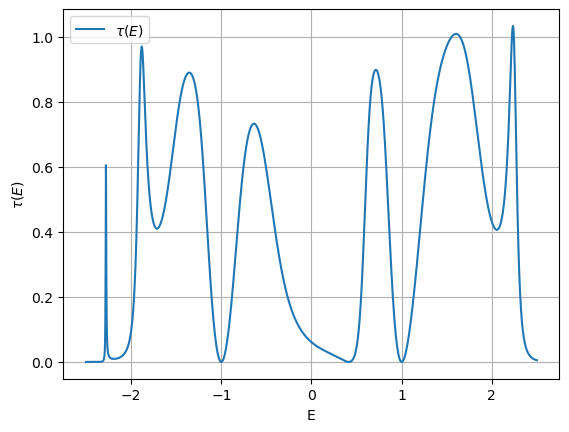

In [8]:
# Graficar tau(E)
plt.plot(E_values, tau_values, label='$\\tau(E)$')
plt.xlabel('E')
plt.ylabel('$\\tau(E)$')
plt.legend()
plt.grid(True)
plt.savefig('transmision-3000.png')